In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, hbar, k


import sys

sys.path.append('../scripts')

%load_ext autoreload
%autoreload 2

from elements import *

import measurement as me

In [3]:
omega_cav1 = 5e9*np.pi*2
kappa_01 = 0.3e6*np.pi*2

omega_m1 = 5e6*np.pi*2
gamma_m1 = 100*np.pi*2
g_011 = 200*np.pi*2
g_012 = 200*np.pi*2

omega_m2 = 10e6*np.pi*2
gamma_m2 = 100*np.pi*2
g_021 = 200*np.pi*2
g_022 = 200*np.pi*2

omega_cav2 = 7e9*np.pi*2
kappa_02 = 0.3e6*np.pi*2

P_in11 = 8e-11
Delta1 = -(omega_m1)
omega_drive11 = omega_cav1 + Delta1
T_drive11 = 1
kappa_ex11 = 0.4e6*np.pi*2

P_in12 = 8e-11
Delta2 = -omega_m2
omega_drive12 = omega_cav1 + Delta2
T_drive12 = 10e-3
kappa_ex12 = 0.4e6*np.pi*2

P_in21 = 8e-11
Delta1 = -(omega_m1)
omega_drive21 = omega_cav2 + Delta1
T_drive21 = 1
kappa_ex21 = 0.4e6*np.pi*2

P_in22 = 8e-11
Delta2 = -omega_m2
omega_drive22 = omega_cav2 + Delta2
T_drive22 = 10e-3
kappa_ex22 = 0.4e6*np.pi*2

In [4]:
from DCnonlinearities import optomechanics

omdir11 = optomechanics(P_in11, kappa_01, kappa_ex11, omega_cav1, omega_drive11, omega_m1, g_011)
g_11= omdir11['g']

omdir12 = optomechanics(P_in12, kappa_01, kappa_ex12, omega_cav1, omega_drive12, omega_m2, g_012)
g_12= omdir12['g']

omdir21 = optomechanics(P_in21, kappa_02, kappa_ex21, omega_cav2, omega_drive21, omega_m1, g_021)
g_21= omdir21['g']

omdir22 = optomechanics(P_in22, kappa_02, kappa_ex22, omega_cav2, omega_drive22, omega_m2, g_022)
g_22= omdir22['g']

In [5]:
a1 = Mode('a1', omega_cav1)
b1 = Mode('b1', omega_m1)
b2 = Mode('b2', omega_m2)
a2 = Mode('a2', omega_cav2)

g_a1b1 = Coupling(a1, b1, g_11 * np.array([1,0,0,0]))
g_a1b2 = Coupling(a1, b2, g_12 * np.array([1,0,0,0]))
g_a2b1 = Coupling(a2, b1, g_21 * np.array([1,0,0,0]))
g_a2b2 = Coupling(a2, b2, g_22 * np.array([1,0,0,0]))

a1_in0 = Input('0', a1, kappa_01, kind = 'bath', bath_temp=10e-3)
a2_in0 = Input('0', a2, kappa_02, kind = 'bath', bath_temp=10e-3)
b1_in0 = Input('0', b1, gamma_m1, kind = 'bath', bath_temp=10e-3)
b2_in0 = Input('0', b2, gamma_m2, kind = 'bath', bath_temp=10e-3)

sys_om = System([a1, a2, b1, b2], [a1_in0, a2_in0, b1_in0, b2_in0], [g_a1b1, g_a1b2, g_a2b1, g_a2b2])

<IPython.core.display.Javascript object>


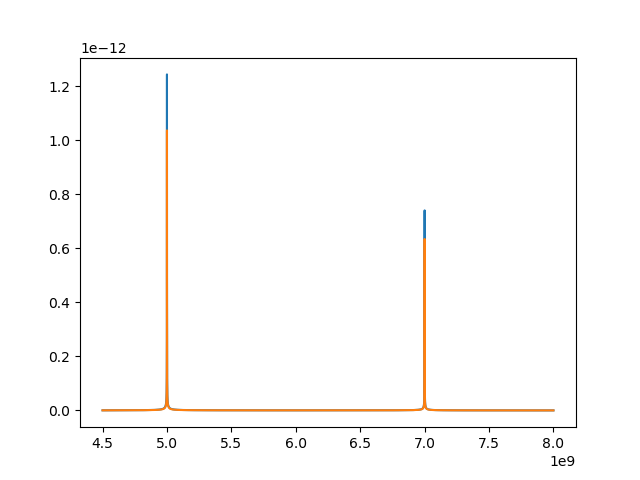

In [10]:
a2_out = Output(sys_om, a2_in0)
omegas = np.linspace( omega_cav1 - 100* omega_m1, omega_cav2 +  100*omega_m2, 20000)
omegas_new21, S21 = me.linear_response(omegas, sys_om, a2_out, a1_in0, plot = 0)

a1_out = Output(sys_om, a1_in0)
omegas = np.linspace(omega_cav1 - 100* omega_m1, omega_cav2 +  100*omega_m2, 20000)
omegas_new21, S12 = me.linear_response(omegas, sys_om, a1_out, a2_in0, plot = 0)

plt.plot(omegas/2/np.pi, abs(S21))
plt.plot(omegas/2/np.pi, abs(S12))